# cafe sales time series analysis
This notebook loads data and prepares the data for cafe sales time series analysis .

In [1]:
import pandas as pd
import numpy as np
print('Dataset is loaded for analysis')

Dataset is loaded for analysis


In [2]:
# load cafe sales dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/third/first semister/machine lear/mlproject/sales prediction model/dirty_cafe_sales.csv')
df.head()

Mounted at /content/drive


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [3]:
print(f'dataset shape:{df.shape}')
print(df.isnull().sum())

dataset shape:(10000, 8)
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


In [4]:
#Numeric Columns: Convert Quantity, Price Per Unit, and Total Spent to numeric types:
df[['Quantity', 'Price Per Unit', 'Total Spent']] = df[['Quantity', 'Price Per Unit', 'Total Spent']].apply(pd.to_numeric, errors='coerce')
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce', format='%Y-%m-%d')

#Replace "UNKNOWN" and "ERROR" with NaN for consistency:
df.replace(['UNKNOWN', 'ERROR', 'UnKNOWN'], pd.NA, inplace=True)

In [5]:
# List of numeric columns
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

# Fill missing values with the median of each column
# Fill missing values with the median of each numeric column
median_dict = {col: df[col].median() for col in numeric_cols}
df.fillna(median_dict, inplace=True)

In [6]:
# List of categorical columns
categorical_cols = ['Item', 'Payment Method', 'Location']

# Fill missing values with the mode (most frequent value) of each column
for col in categorical_cols:
    mode_value = df[col].mode().iloc[0]
    df[col] = df[col].fillna(mode_value)

# Categorical Data Standardization
categorical_cols = ['Item', 'Payment Method', 'Location']

for col in categorical_cols:
    df[col] = df[col].str.upper()

#Check for duplicate Transaction ID:
df.drop_duplicates(subset=['Transaction ID'], inplace=True)
df =df.dropna(subset=['Transaction Date'])

In [7]:
# data = pd.get_dummies(data, columns=['Payment Method', 'Location', 'Item'], drop_first=True)
df = pd.get_dummies(df, columns=['Payment Method', 'Location', 'Item'], drop_first=True)

In [8]:
# See how many missing values exist in each column
print(df.isnull().sum())

df.info()

Transaction ID                   0
Quantity                         0
Price Per Unit                   0
Total Spent                      0
Transaction Date                 0
Payment Method_CREDIT CARD       0
Payment Method_DIGITAL WALLET    0
Location_TAKEAWAY                0
Item_COFFEE                      0
Item_COOKIE                      0
Item_JUICE                       0
Item_SALAD                       0
Item_SANDWICH                    0
Item_SMOOTHIE                    0
Item_TEA                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction ID                 9540 non-null   object        
 1   Quantity                       9540 non-null   float64       
 2   Price Per Unit                 9540 non-null   float64       
 3   Total Spent         

In [9]:
outlier_info = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_info[col] = {
        'outlier_count': outliers.shape[0],
        'percent_of_data': 100 * outliers.shape[0] / df.shape[0]
    }
# Show summary
import pprint
pprint.pprint(outlier_info)

{'Price Per Unit': {'outlier_count': 0, 'percent_of_data': 0.0},
 'Quantity': {'outlier_count': 0, 'percent_of_data': 0.0},
 'Total Spent': {'outlier_count': 250, 'percent_of_data': 2.620545073375262}}


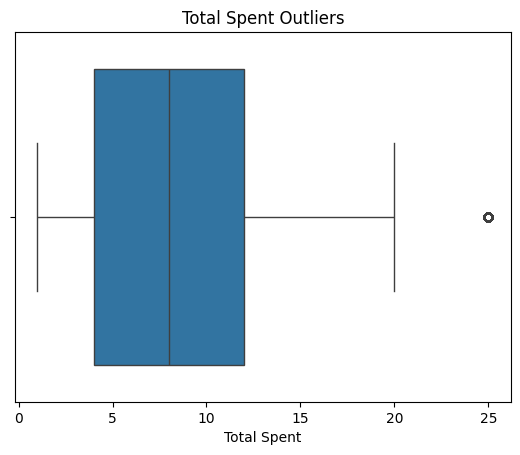

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Total Spent'])
plt.title("Total Spent Outliers")
plt.show()

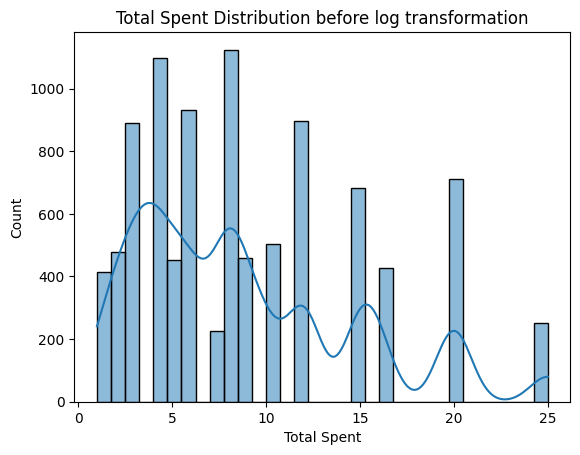

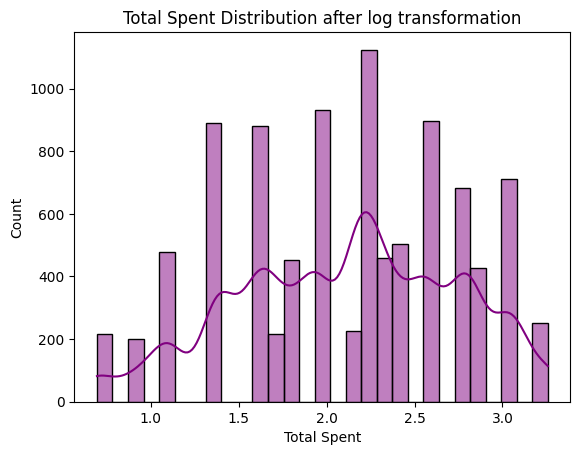

In [12]:
sns.histplot(df['Total Spent'], kde=True)
plt.title("Total Spent Distribution before log transformation")
plt.show()

df['Total Spent'] = np.log1p(df['Total Spent'])
plt.title("Total Spent Distribution after log transformation")
sns.histplot(df['Total Spent'], kde=True,color="purple")
plt.show()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Transaction ID                 9540 non-null   object        
 1   Quantity                       9540 non-null   float64       
 2   Price Per Unit                 9540 non-null   float64       
 3   Total Spent                    9540 non-null   float64       
 4   Transaction Date               9540 non-null   datetime64[ns]
 5   Payment Method_CREDIT CARD     9540 non-null   bool          
 6   Payment Method_DIGITAL WALLET  9540 non-null   bool          
 7   Location_TAKEAWAY              9540 non-null   bool          
 8   Item_COFFEE                    9540 non-null   bool          
 9   Item_COOKIE                    9540 non-null   bool          
 10  Item_JUICE                     9540 non-null   bool          
 11  Item_SALAD            

In [15]:
print(df.index.duplicated().sum())

0


In [14]:
df_clean= df.copy()
df_clean.head(10)

,Transaction ID,Quantity,Price Per Unit,Total Spent,Transaction Date,Payment Method_CREDIT CARD,Payment Method_DIGITAL WALLET,Location_TAKEAWAY,Item_COFFEE,Item_COOKIE,Item_JUICE,Item_SALAD,Item_SANDWICH,Item_SMOOTHIE,Item_TEA
0,TXN_1961373,2.0,2.0,1.609438,2023-09-08,True,False,True,True,False,False,False,False,False,False
1,TXN_4977031,4.0,3.0,2.564949,2023-05-16,False,False,False,False,False,False,False,False,False,False
2,TXN_4271903,4.0,1.0,2.197225,2023-07-19,True,False,False,False,True,False,False,False,False,False
3,TXN_7034554,2.0,5.0,2.397895,2023-04-27,False,True,True,False,False,False,True,False,False,False
4,TXN_3160411,2.0,2.0,1.609438,2023-06-11,False,True,False,True,False,False,False,False,False,False
5,TXN_2602893,5.0,4.0,3.044522,2023-03-31,True,False,True,False,False,False,False,False,True,False
6,TXN_4433211,3.0,3.0,2.302585,2023-10-06,False,True,True,False,False,True,False,False,False,False
7,TXN_6699534,4.0,4.0,2.833213,2023-10-28,False,False,True,False,False,False,False,True,False,False
8,TXN_4717867,5.0,3.0,2.772589,2023-07-28,False,True,True,False,False,True,False,False,False,False
9,TXN_2064365,5.0,4.0,3.044522,2023-12-31,False,True,False,False,False,False,False,True,False,False


In [ ]:
df = df_clean.copy()

df = df.sort_values('Transaction Date')
df.set_index('Transaction Date', inplace=True)

daily_sales = df['Total Spent'].resample('D').sum()

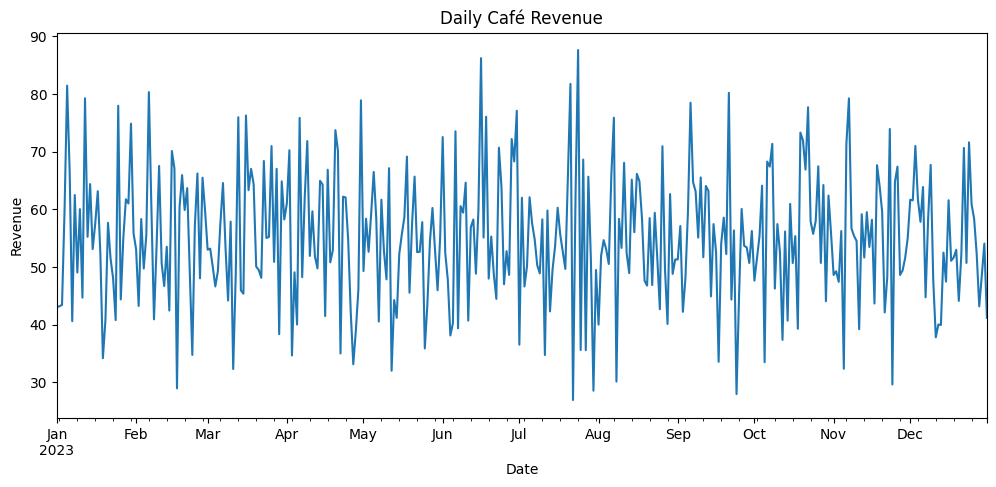

In [ ]:
import matplotlib.pyplot as plt

daily_sales.plot(figsize=(12,5))
plt.title("Daily Café Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

/tmp/ipython-input-3222388119.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Spent'].resample('M').sum()


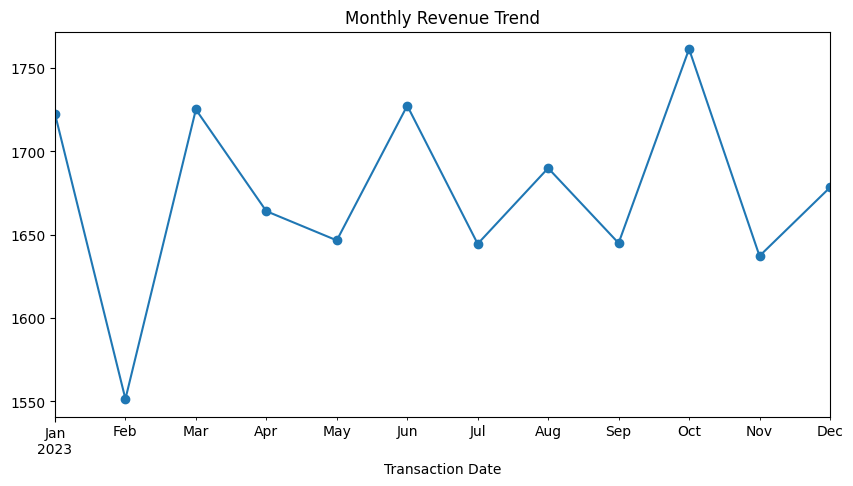

In [ ]:
monthly_sales = df['Total Spent'].resample('M').sum()

monthly_sales.plot(marker='o', figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.show()

day_name
Friday       2.102754
Monday       2.095104
Saturday     2.095845
Sunday       2.104267
Thursday     2.122798
Tuesday      2.136321
Wednesday    2.087035
Name: Total Spent, dtype: float64


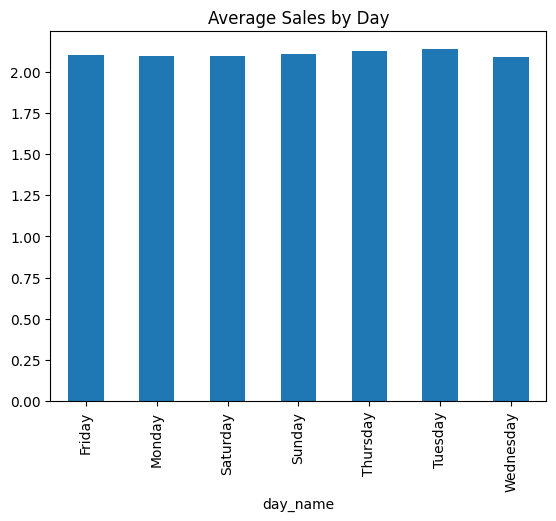

In [ ]:
df['day_name'] = df.index.day_name()

weekday_sales = df.groupby('day_name')['Total Spent'].mean()
print(weekday_sales)

weekday_sales.plot(kind='bar')
plt.title("Average Sales by Day")
plt.show()

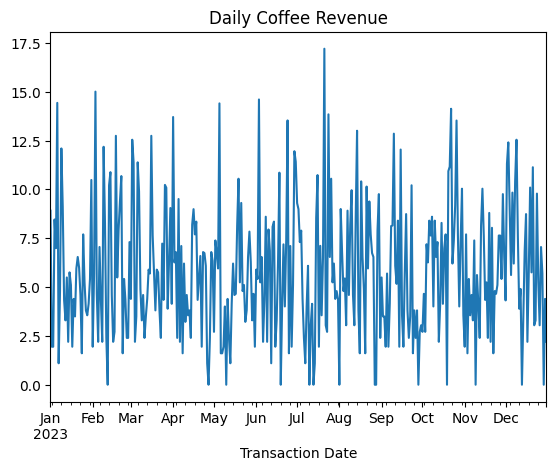

In [ ]:
df['is_weekend'] = df.index.weekday >= 5

df.groupby('is_weekend')['Total Spent'].mean()

coffee_sales = df[df['Item_COFFEE'] == True]['Total Spent'].resample('D').sum()
coffee_sales.plot()
plt.title("Daily Coffee Revenue")
plt.show()

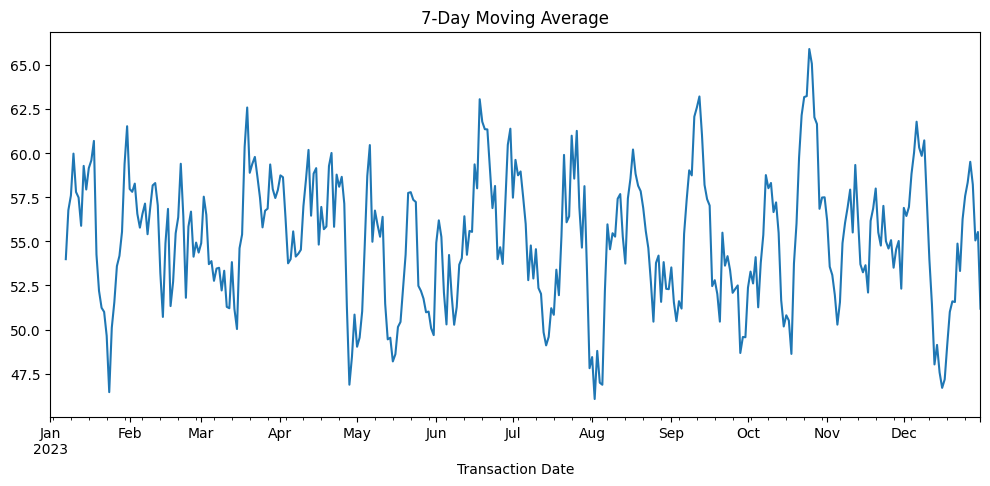

In [ ]:
daily_sales.rolling(7).mean().plot(figsize=(12,5))
plt.title("7-Day Moving Average")
plt.show()

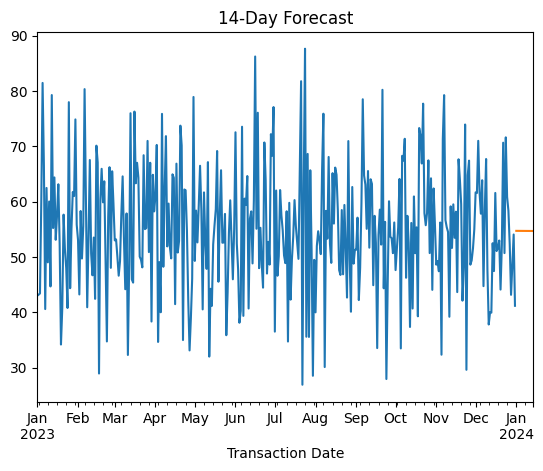

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(daily_sales, trend='add')
fit = model.fit()

forecast = fit.forecast(14)

daily_sales.plot()
forecast.plot()
plt.title("14-Day Forecast")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9540 entries, 2023-01-01 to 2023-12-31
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Transaction ID                 9540 non-null   object 
 1   Quantity                       9540 non-null   float64
 2   Price Per Unit                 9540 non-null   float64
 3   Total Spent                    9540 non-null   float64
 4   Payment Method_CREDIT CARD     9540 non-null   bool   
 5   Payment Method_DIGITAL WALLET  9540 non-null   bool   
 6   Location_TAKEAWAY              9540 non-null   bool   
 7   Item_COFFEE                    9540 non-null   bool   
 8   Item_COOKIE                    9540 non-null   bool   
 9   Item_JUICE                     9540 non-null   bool   
 10  Item_SALAD                     9540 non-null   bool   
 11  Item_SANDWICH                  9540 non-null   bool   
 12  Item_SMOOTHIE                 

In [ ]:
df=df_clean.copy()

df.drop(columns=['Transaction ID'], inplace=True)
df.head(10)

,Quantity,Price Per Unit,Total Spent,Transaction Date,Payment Method_CREDIT CARD,Payment Method_DIGITAL WALLET,Location_TAKEAWAY,Item_COFFEE,Item_COOKIE,Item_JUICE,Item_SALAD,Item_SANDWICH,Item_SMOOTHIE,Item_TEA
0,2.0,2.0,1.609438,2023-09-08,True,False,True,True,False,False,False,False,False,False
1,4.0,3.0,2.564949,2023-05-16,False,False,False,False,False,False,False,False,False,False
2,4.0,1.0,2.197225,2023-07-19,True,False,False,False,True,False,False,False,False,False
3,2.0,5.0,2.397895,2023-04-27,False,True,True,False,False,False,True,False,False,False
4,2.0,2.0,1.609438,2023-06-11,False,True,False,True,False,False,False,False,False,False
5,5.0,4.0,3.044522,2023-03-31,True,False,True,False,False,False,False,False,True,False
6,3.0,3.0,2.302585,2023-10-06,False,True,True,False,False,True,False,False,False,False
7,4.0,4.0,2.833213,2023-10-28,False,False,True,False,False,False,False,True,False,False
8,5.0,3.0,2.772589,2023-07-28,False,True,True,False,False,True,False,False,False,False
9,5.0,4.0,3.044522,2023-12-31,False,True,False,False,False,False,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9540 entries, 2023-01-01 to 2023-12-31
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Quantity                       9540 non-null   float64
 1   Price Per Unit                 9540 non-null   float64
 2   Total Spent                    9540 non-null   float64
 3   Payment Method_CREDIT CARD     9540 non-null   bool   
 4   Payment Method_DIGITAL WALLET  9540 non-null   bool   
 5   Location_TAKEAWAY              9540 non-null   bool   
 6   Item_COFFEE                    9540 non-null   bool   
 7   Item_COOKIE                    9540 non-null   bool   
 8   Item_JUICE                     9540 non-null   bool   
 9   Item_SALAD                     9540 non-null   bool   
 10  Item_SANDWICH                  9540 non-null   bool   
 11  Item_SMOOTHIE                  9540 non-null   bool   
 12  Item_TEA                      

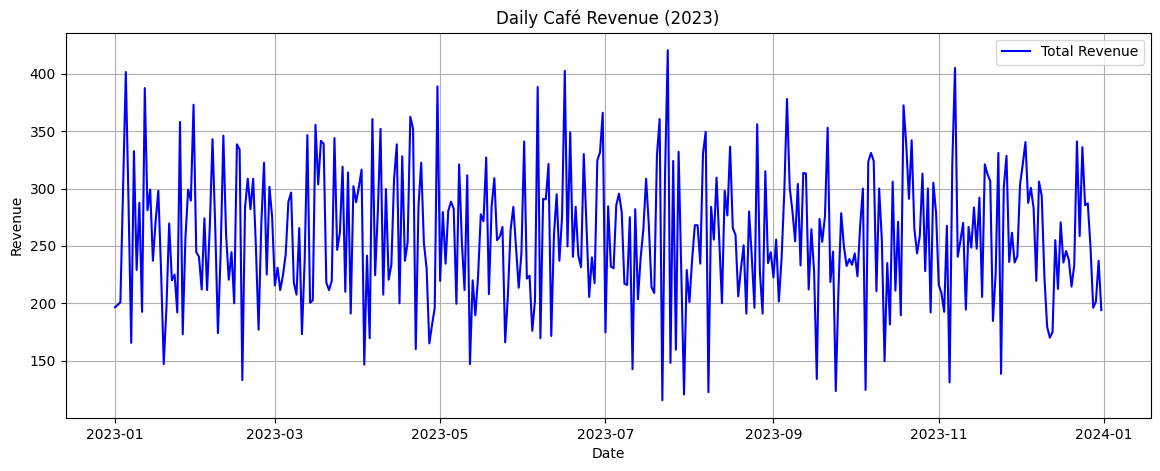

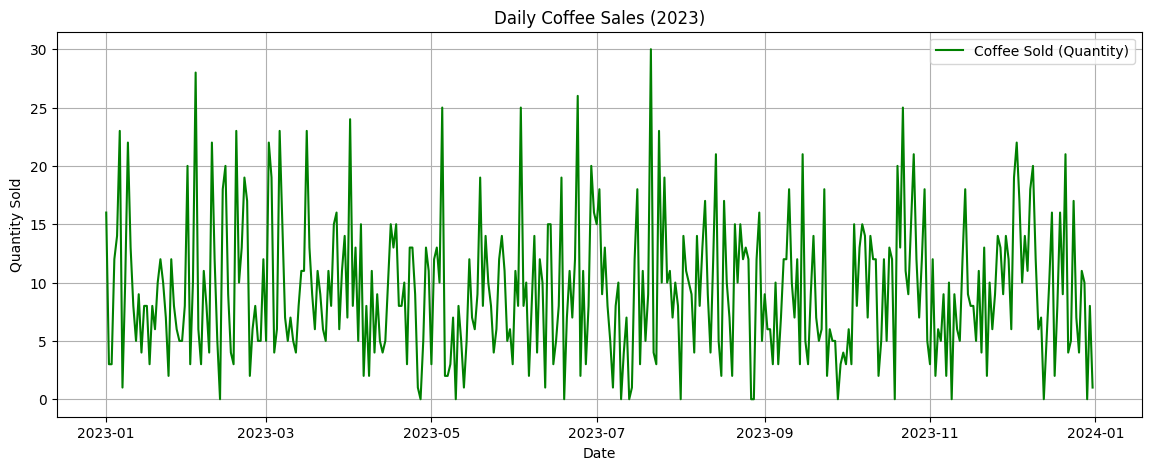

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Convert log revenue back to actual revenue
# -------------------------------
df['Total Spent'] = np.exp(df['Total Spent'])

# -------------------------------
# 2. Ensure 'Transaction Date' is a column
# -------------------------------
if 'Transaction Date' not in df.columns and df.index.name == 'Transaction Date':
    df.reset_index(inplace=True)

# -------------------------------
# 3. Convert to datetime and sort
# -------------------------------
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df = df.sort_values('Transaction Date')
df.set_index('Transaction Date', inplace=True)

# -------------------------------
# 4. Aggregate daily sales
# -------------------------------
daily_sales = df['Total Spent'].resample('D').sum()

# -------------------------------
# 5. Aggregate daily coffee quantity
# -------------------------------
coffee_daily = df[df['Item_COFFEE'] == True]['Quantity'].resample('D').sum().fillna(0)

# -------------------------------
# 6. Plot total daily revenue
# -------------------------------
plt.figure(figsize=(14,5))
plt.plot(daily_sales, color='blue', label='Total Revenue')
plt.title("Daily Café Revenue (2023)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------
# 7. Plot daily coffee sales
# -------------------------------
plt.figure(figsize=(14,5))
plt.plot(coffee_daily, color='green', label='Coffee Sold (Quantity)')
plt.title("Daily Coffee Sales (2023)")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.legend()
plt.show()

Total days: 365
Date range: 2023-01-01 00:00:00 to 2023-12-31 00:00:00


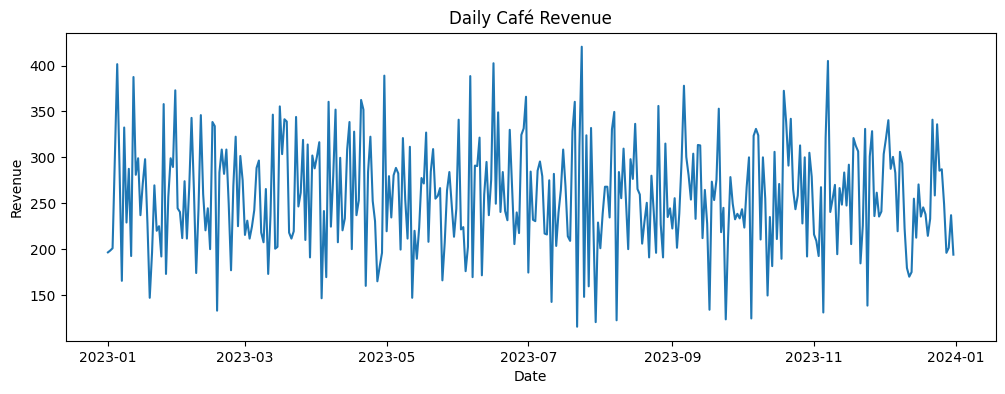

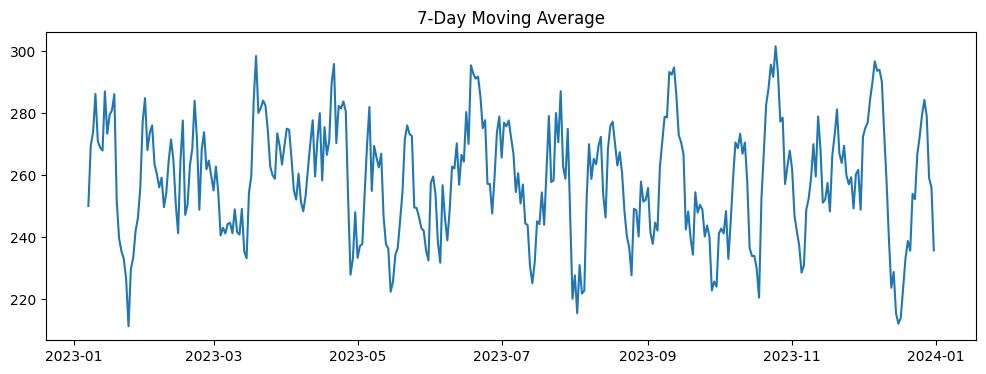


Training days: 351
Testing days: 14

MODEL ACCURACY COMPARISON
Naive
 MAE  = 35.46
 RMSE = 47.88
--------------------------------
Moving Average
 MAE  = 44.39
 RMSE = 58.55
--------------------------------
Holt-Winters
 MAE  = 37.62
 RMSE = 46.06
--------------------------------
ARIMA
 MAE  = 38.17
 RMSE = 45.82
--------------------------------


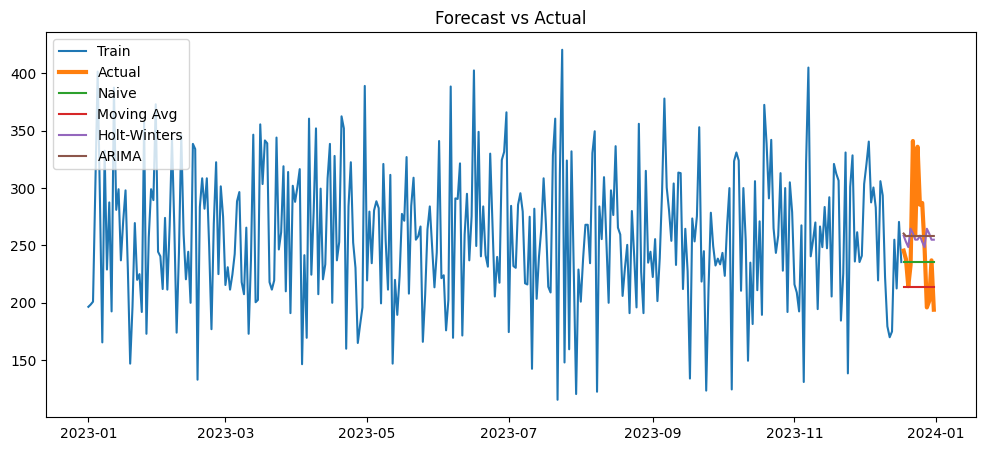


Best Model: ARIMA


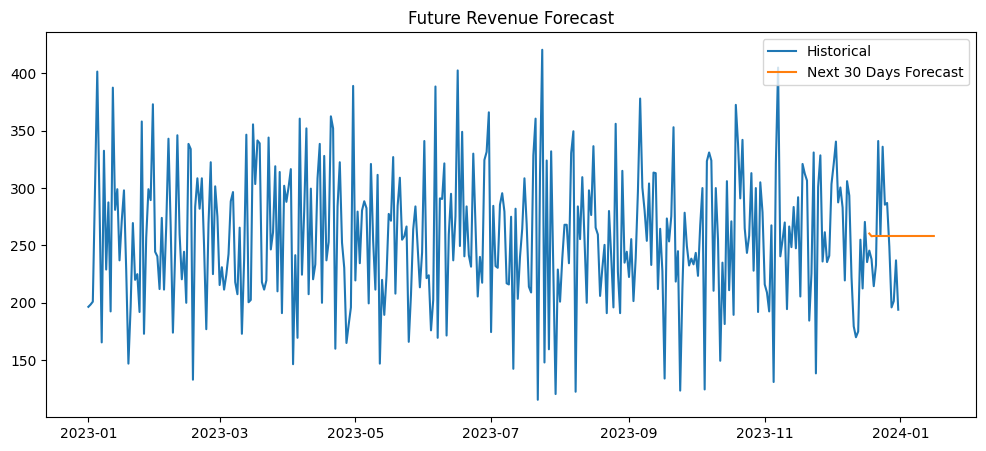

In [ ]:
 # ============================================================
# CAFE SALES FORECASTING USING DAILY REVENUE
# (BASED ON YOUR CURRENT DATA STRUCTURE)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# ------------------------------------------------------------
# 1. CREATE DAILY TIME SERIES FROM TRANSACTIONS
# ------------------------------------------------------------

# ensure sorted
df = df.sort_index()

# aggregate total revenue per day
daily_sales = df['Total Spent'].resample('D').sum()

# fill missing days
daily_sales = daily_sales.fillna(0)

print("Total days:", len(daily_sales))
print("Date range:", daily_sales.index.min(), "to", daily_sales.index.max())

# ------------------------------------------------------------
# 2. VISUALIZE TREND
# ------------------------------------------------------------

plt.figure(figsize=(12,4))
plt.plot(daily_sales)
plt.title("Daily Café Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# 7-day moving average (trend)
plt.figure(figsize=(12,4))
plt.plot(daily_sales.rolling(7).mean())
plt.title("7-Day Moving Average")
plt.show()

# ------------------------------------------------------------
# 3. TRAIN / TEST SPLIT
# ------------------------------------------------------------

forecast_days = 14

train = daily_sales[:-forecast_days]
test = daily_sales[-forecast_days:]

print("\nTraining days:", len(train))
print("Testing days:", len(test))

# ------------------------------------------------------------
# 4. MODEL 1 — NAIVE FORECAST
# ------------------------------------------------------------

naive_forecast = np.repeat(train.iloc[-1], forecast_days)

# ------------------------------------------------------------
# 5. MODEL 2 — MOVING AVERAGE
# ------------------------------------------------------------

moving_avg_value = train.rolling(7).mean().iloc[-1]
moving_avg_forecast = np.repeat(moving_avg_value, forecast_days)

# ------------------------------------------------------------
# 6. MODEL 3 — HOLT-WINTERS (BEST FOR DAILY BUSINESS DATA)
# ------------------------------------------------------------

hw_model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=7   # weekly pattern
).fit()

hw_forecast = hw_model.forecast(forecast_days)

# ------------------------------------------------------------
# 7. MODEL 4 — ARIMA
# ------------------------------------------------------------

arima_model = ARIMA(train, order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(forecast_days)

# ------------------------------------------------------------
# 8. ACCURACY METRICS
# ------------------------------------------------------------

def evaluate(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse

results = {}

results['Naive'] = evaluate(test, naive_forecast)
results['Moving Average'] = evaluate(test, moving_avg_forecast)
results['Holt-Winters'] = evaluate(test, hw_forecast)
results['ARIMA'] = evaluate(test, arima_forecast)

# ------------------------------------------------------------
# 9. PRINT MODEL PERFORMANCE
# ------------------------------------------------------------

print("\nMODEL ACCURACY COMPARISON")
print("================================")

for model, (mae, rmse) in results.items():
    print(f"{model}")
    print(f" MAE  = {mae:.2f}")
    print(f" RMSE = {rmse:.2f}")
    print("--------------------------------")

# ------------------------------------------------------------
# 10. FORECAST COMPARISON PLOT
# ------------------------------------------------------------

plt.figure(figsize=(12,5))

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual', linewidth=3)

plt.plot(test.index, naive_forecast, label='Naive')
plt.plot(test.index, moving_avg_forecast, label='Moving Avg')
plt.plot(test.index, hw_forecast, label='Holt-Winters')
plt.plot(test.index, arima_forecast, label='ARIMA')

plt.legend()
plt.title("Forecast vs Actual")
plt.show()

# ------------------------------------------------------------
# 11. SELECT BEST MODEL & FORECAST NEXT 30 DAYS
# ------------------------------------------------------------

best_model_name = min(results, key=lambda x: results[x][1])
print("\nBest Model:", best_model_name)

if best_model_name == 'Holt-Winters':
    best_model = hw_model
elif best_model_name == 'ARIMA':
    best_model = arima_model
else:
    best_model = hw_model   # fallback

future_forecast = best_model.forecast(30)

plt.figure(figsize=(12,5))
plt.plot(daily_sales, label='Historical')
plt.plot(future_forecast, label='Next 30 Days Forecast')
plt.legend()
plt.title("Future Revenue Forecast")
plt.show()

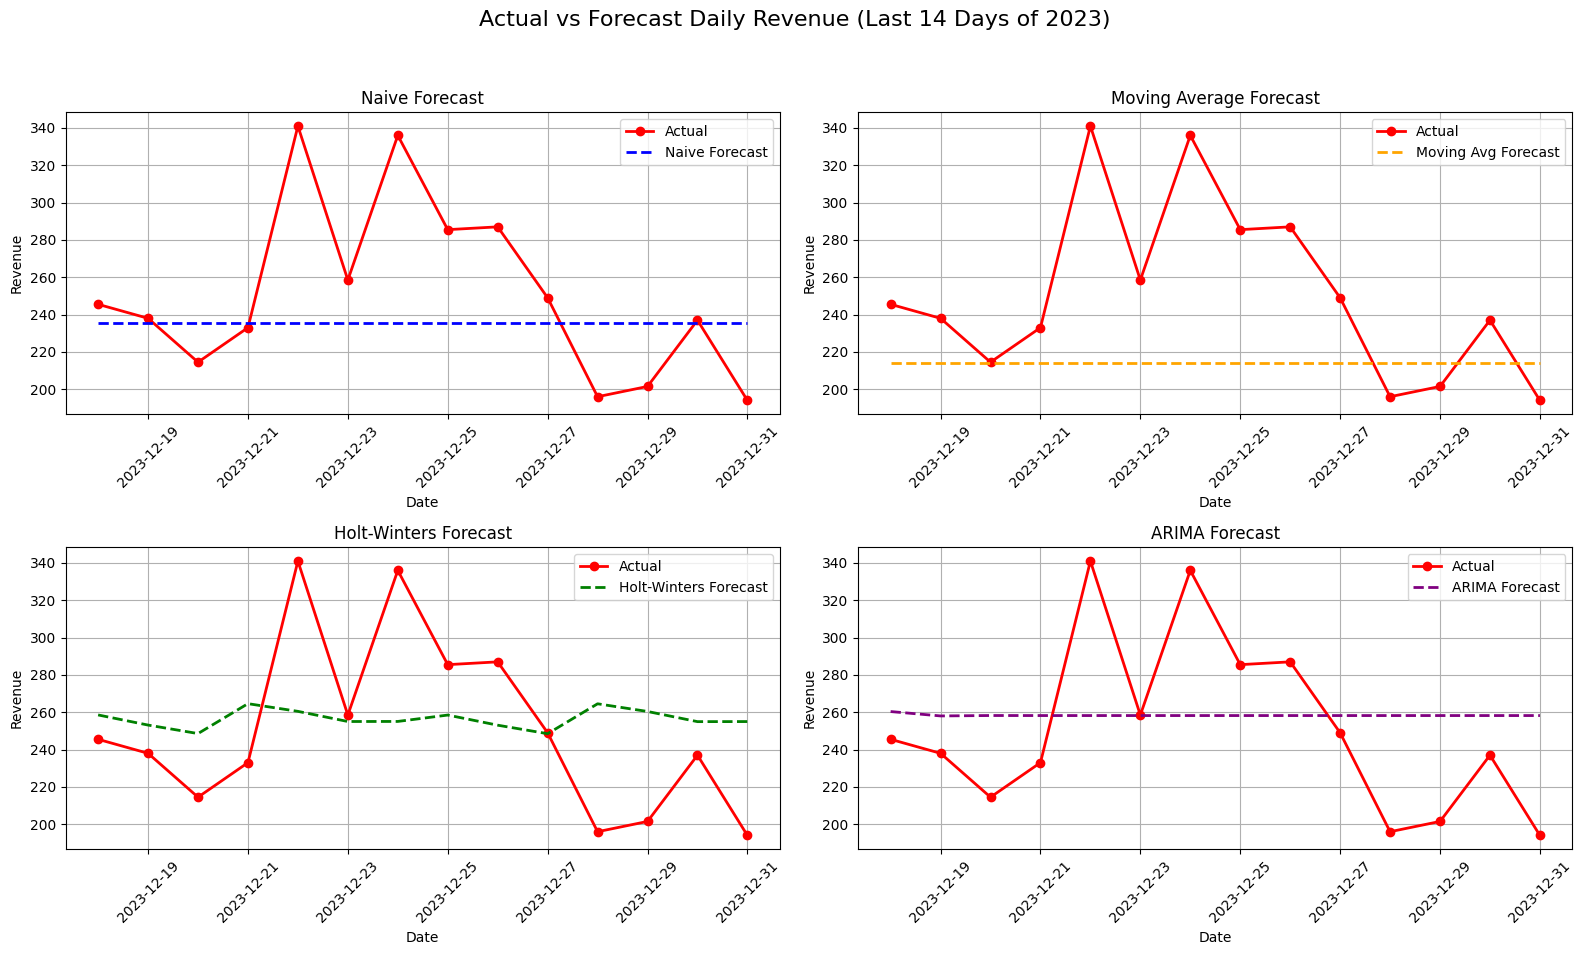

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# -------------------------------
# Forecast preparation
# -------------------------------
forecast_days = 14
train = daily_sales[:-forecast_days]
test = daily_sales[-forecast_days:]

# Naive
naive_forecast = np.repeat(train.iloc[-1], forecast_days)

# Moving Average
moving_avg_value = train.rolling(7).mean().iloc[-1]
moving_avg_forecast = np.repeat(moving_avg_value, forecast_days)

# Holt-Winters
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()
hw_forecast = hw_model.forecast(forecast_days)

# ARIMA
arima_model = ARIMA(train, order=(1,1,1)).fit()
arima_forecast = arima_model.forecast(forecast_days)

# -------------------------------
# 2. Subplots for clear comparison
# -------------------------------
fig, axs = plt.subplots(2, 2, figsize=(16,10))
fig.suptitle("Actual vs Forecast Daily Revenue (Last 14 Days of 2023)", fontsize=16)

# Subplot 1: Naive
axs[0,0].plot(test.index, test, color='red', marker='o', label='Actual', linewidth=2)
axs[0,0].plot(test.index, naive_forecast, color='blue', linestyle='--', label='Naive Forecast', linewidth=2)
axs[0,0].set_title("Naive Forecast")
axs[0,0].grid(True)
axs[0,0].legend()

# Subplot 2: Moving Average
axs[0,1].plot(test.index, test, color='red', marker='o', label='Actual', linewidth=2)
axs[0,1].plot(test.index, moving_avg_forecast, color='orange', linestyle='--', label='Moving Avg Forecast', linewidth=2)
axs[0,1].set_title("Moving Average Forecast")
axs[0,1].grid(True)
axs[0,1].legend()

# Subplot 3: Holt-Winters
axs[1,0].plot(test.index, test, color='red', marker='o', label='Actual', linewidth=2)
axs[1,0].plot(test.index, hw_forecast, color='green', linestyle='--', label='Holt-Winters Forecast', linewidth=2)
axs[1,0].set_title("Holt-Winters Forecast")
axs[1,0].grid(True)
axs[1,0].legend()

# Subplot 4: ARIMA
axs[1,1].plot(test.index, test, color='red', marker='o', label='Actual', linewidth=2)
axs[1,1].plot(test.index, arima_forecast, color='purple', linestyle='--', label='ARIMA Forecast', linewidth=2)
axs[1,1].set_title("ARIMA Forecast")
axs[1,1].grid(True)
axs[1,1].legend()

# Rotate x-axis labels for clarity
for ax in axs.flat:
    ax.set_xlabel("Date")
    ax.set_ylabel("Revenue")
    plt.setp(ax.get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()